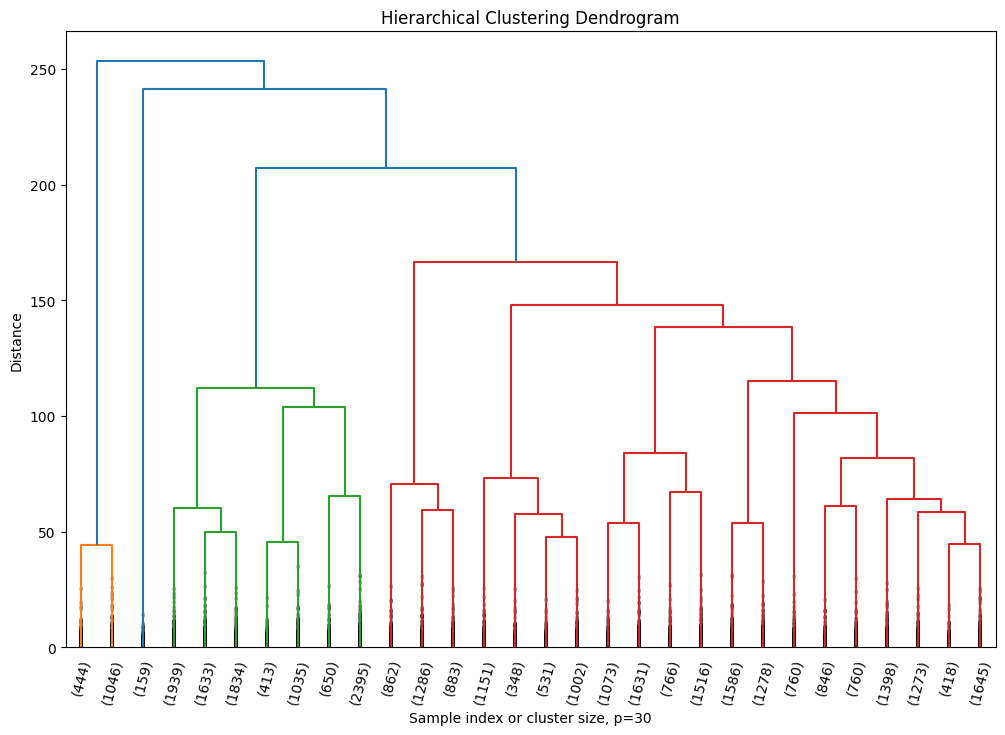

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the dataset
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]
df = pd.read_csv('/content/adult.data', header=None, names=column_names, na_values=" ?", skipinitialspace=True)

# Drop the target column as it is not needed for unsupervised learning
X = df.drop(columns=["income"])

# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Convert sparse matrix to dense matrix if necessary
X_dense = X_preprocessed.toarray() if hasattr(X_preprocessed, "toarray") else X_preprocessed

# Perform hierarchical clustering
hierarchical_linkage = linkage(X_dense, method='ward')  # Ward's method minimizes variance within clusters

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(hierarchical_linkage, truncate_mode="lastp", p=30, leaf_rotation=75, leaf_font_size=10, show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index or cluster size, p=30")
plt.ylabel("Distance")
plt.show()
